# Metadata general information

## 1. General Setup and Importing Data

In [49]:
import os
import pandas as pd
from qiime2 import Visualization
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm


import qiime2 as q2

%matplotlib inline

In [7]:
metadata = pd.read_csv('data/raw_data/updog_metadata.tsv', sep='\t',index_col=0)

metadata.head()



## 2. Metadata overview
### 2.1. Country distribution per lifestyle

In [3]:
country_distribution = metadata.groupby(by= ['country' ])

country_distribution = country_distribution.size()

country_distribution

country
Cameroon    57
Italy       10
Peru        18
Tanzania    22
USA         19
dtype: int64

<Axes: title={'center': 'Frequency of samples per lifestyle'}, xlabel='Lifestyle', ylabel='Sample Counts'>

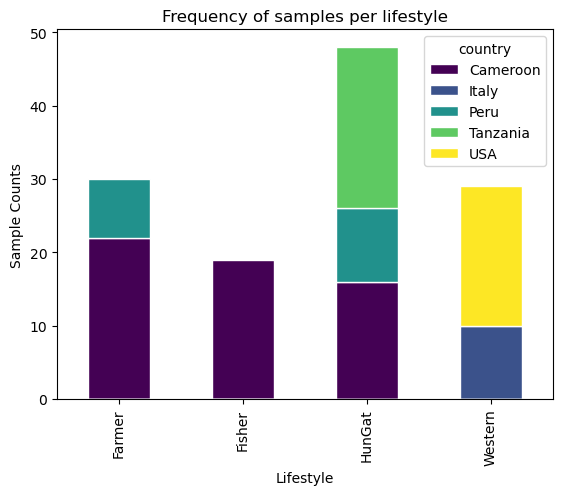

In [57]:
country_lifestyle = metadata.groupby(by= ['subsistence_mode', 'country' ])

country_lifestyle = country_lifestyle.size()

#dataframe with countries as columns and lifestyle as rows
country_lifestyle_df = country_lifestyle.unstack(fill_value=0)

country_plot = country_lifestyle_df.plot.bar(ylabel = 'Sample Counts', 
                      xlabel = 'Lifestyle', 
                      title='Frequency of samples per lifestyle',
                      cmap = 'viridis', edgecolor='white',       
                     stacked=True)

plt.savefig('country_plot.png', dpi=300, bbox_inches='tight')

country_plot

### 2.2. Sex distribution per Lifestyle

In [16]:
sex_distribution = metadata.groupby(by= ['sex'])
sex_distribution = sex_distribution.size()
sex_distribution

sex
F    61
M    65
dtype: int64

/tmp/ipykernel_103/83511018.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('viridis')


<Axes: title={'center': 'Sex distribution of samples per lifestyle'}, xlabel='Lifestyle', ylabel='Sample Counts'>

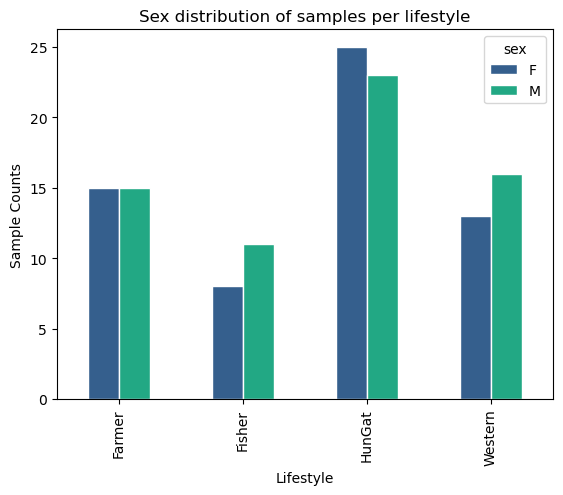

In [60]:
sex_lifestyle = metadata.groupby(by= ['subsistence_mode', 'sex' ])

sex_lifestyle = sex_lifestyle.size()

#dataframe with countries as columns and lifestyle as rows
sex_lifestyle_df = sex_lifestyle.unstack(fill_value=0)

cmap = cm.get_cmap('viridis')
colors = [cmap(0.3), cmap(0.6)]

sex_plot = sex_lifestyle_df.plot.bar(ylabel = 'Sample Counts', 
                      xlabel = 'Lifestyle',  edgecolor='white',
                      color=colors,
                      title='Sex distribution of samples per lifestyle',
                    
                     )

plt.savefig('sex_plot.png', dpi=300, bbox_inches='tight')

sex_plot

### Age distribution

<Axes: title={'center': 'Age Distribution of Samples'}, xlabel='Age', ylabel='Sample Count'>

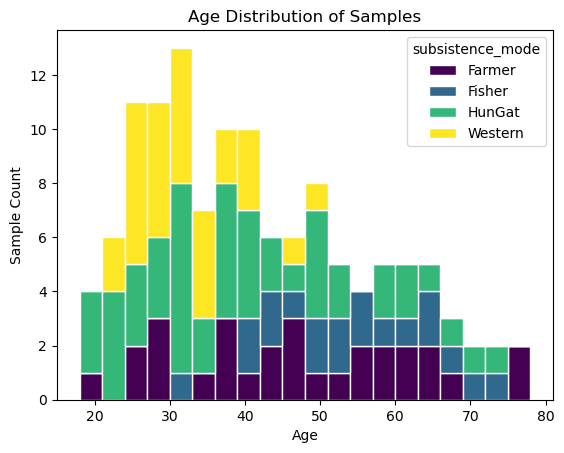

In [61]:
#Remove ages above 150
metadata_filtered = metadata[metadata['age'] <= 150]

#Pivot so each subsistence_mode is a column
ages_wide = metadata_filtered.pivot(columns='subsistence_mode', values='age')

#Plot stacked histogram
age_plot = ages_wide.plot.hist(stacked=True, bins=20, edgecolor='white', 
                    ylabel= 'Sample Count' , xlabel = 'Age',
                   cmap = 'viridis', title = 'Age Distribution of Samples')

plt.savefig('age_plot.png', dpi=300, bbox_inches='tight')

age_plot

### 2.4 BMI distribution

<Axes: title={'center': 'BMI Distribution of Samples'}, xlabel='BMI', ylabel='Sample Count'>

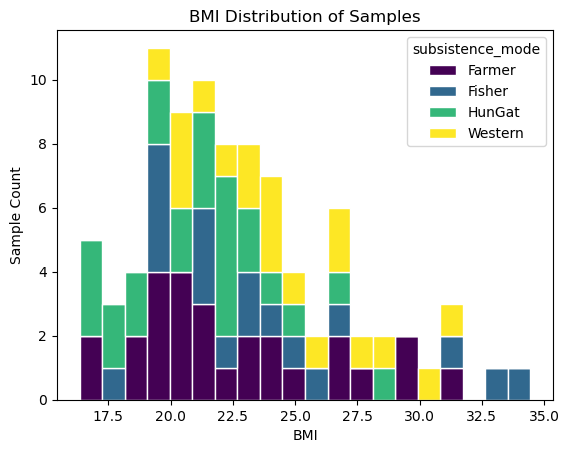

In [63]:
bmi_wide = metadata_filtered.pivot(columns='subsistence_mode', values='bmi')

#Plot stacked histogram
bmi_plot = bmi_wide.plot.hist(stacked=True, bins=20, edgecolor='white',
                  ylabel= 'Sample Count' , xlabel = 'BMI',
                  cmap = 'viridis', title = 'BMI Distribution of Samples')

plt.savefig('bmi_plot.png', dpi=300, bbox_inches='tight')

bmi_plot